<a href="https://colab.research.google.com/github/aneelabashir786/AI-ML-Tasks/blob/main/aneela_bashir_LR_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Linear Regression** is a fundamental statistical and machine learning technique used to model the relationship between a dependent variable (target) and one or more independent variables (features). It works by fitting a straight line (in simple linear regression) or a hyperplane (in multiple linear regression) that best predicts the target variable based on the input features. The primary goal is to find the line that minimizes the difference between the actual and predicted values, often using methods like least squares or gradient descent. Linear regression is widely used because of its simplicity, interpretability, and efficiency, making it ideal for understanding trends, forecasting outcomes (like house prices or sales), and identifying relationships between variables. It’s best suited for numeric and continuous data with a linear relationship, but it can also handle categorical variables after proper encoding. It's important in real-world applications like finance, economics, healthcare, and business analytics because it provides insights into how features influence outcomes and helps in making data-driven decisions. However, it assumes linearity, no multicollinearity, and normally distributed residuals, so it's essential to check and prepare the data accordingly.

Import Libraries

In [ ]:
import numpy as np # for numerical calculations
import pandas as pd # for data-manipulaton and analysis
from sklearn.model_selection import train_test_split # to split test and train data
import matplotlib.pyplot as plt # for data visualization

Class of Linear Regression

In [ ]:
class LinearRegression:
    """
        A simple implementation of Linear Regression using gradient descent.

       Attributes:
        learning_rate (float): The step size for gradient descent updates.
        no_of_iterations (int): Maximum number of iterations for training.
        tolerance (float): Minimum change in cost to determine convergence.
        cost_history (list): History of cost values per iteration.
        converged (bool): Flag indicating if the model converged.
        trained (bool): Flag indicating if the model was trained.
    """
    def __init__(self, learning_rate, no_of_iterations, tolerance):
        """Initialize the Linear Regression model."""
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations
        self.tolerance = tolerance
        self.cost_history = []
        self.converged = False
        self.trained = False

    def fit(self, X, Y):
        """Train the model using gradient descent."""
        self.X_original = X
        self.Y = Y

       # Standardize features and add bias term (intercept)
        self.X_scaled, self.X_bias = self.preprocess_input(X)

        # Initialize weights (including bias term) to zeros
        self.m, self.n = self.X_bias.shape
        self.weights = np.zeros(self.n)

         # Start gradient descent loop
        self.gradient_descent()
        self.trained = True

       # Perform validation checks after training
        self.validate_learning()

    def validate_learning(self):
         """Prints warnings if the cost didn't decrease or model didn't converge."""
         if len(self.cost_history) > 1:
             if not all(earlier >= later for earlier, later in zip(self.cost_history, self.cost_history[1:])):
                  print("Warning: Cost did not decrease consistently during training.")
         if not self.converged:
                  print("Warning: Model did not converge within the maximum number of iterations.")
         print(f"Final cost: {self.cost_history[-1]:.6f}")

    def gradient_descent(self):
        """Iteratively updates weights to minimize cost using gradient descent."""
        for i in range(self.no_of_iterations):
            self.update_weights()
            cost = self.compute_cost(self.X_bias, self.Y)
            self.cost_history.append(cost)

            # Stop early if change in cost is less than the tolerance
            if i > 0 and abs(self.cost_history[-2] - cost) < self.tolerance:
                self.converged = True
                print(f"Converged after {i} iterations.")
                break

    def preprocess_input(self, X):
        """Scales features and adds bias column (intercept).

           Parameters:
            X (np.ndarray): Input feature matrix.

           Returns:
            tuple: Scaled feature matrix, and matrix with bias column.
        """
        if not hasattr(self, 'X_mean'):
            self.X_mean = np.mean(X, axis=0)
            self.X_std = np.std(X, axis=0)

            self.X_std[self.X_std == 0] = 1

        X_scaled = (X - self.X_mean) / self.X_std
        X_bias = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled]
        return X_scaled, X_bias

    def compute_cost(self, X, Y):
        """Calculates Mean Squared Error as the cost function.

           Parameters:
               X (np.ndarray): Feature matrix with bias.
               Y (np.ndarray): Actual target values.

            Returns:
                float: The current cost value.
         """
        Y_pred = self.predict(X, internal=True)
        return (1 / (2 * self.m)) * np.sum((Y_pred - Y) ** 2)

    def update_weights(self):
        """Update weights using gradient descent."""
        y_pred = self.predict(self.X_bias, internal=True)
        error = y_pred - self.Y
        gradient = (1 / self.m) * self.X_bias.T.dot(error)
        self.weights -= self.learning_rate * gradient

    def predict(self, X, internal=False):
        """Generates predictions using trained weights.

        Parameters:
            X (np.ndarray): Input features.
            internal (bool): If True, assumes X already includes bias.

        Returns:
            np.ndarray: Predicted target values.

        Raises:
            Exception: If model hasn't been trained and internal=False.
        """
        if not internal and not self.trained:
            raise Exception("Model is not trained yet.")

        if internal:
            X_bias = X
        else:
            _, X_bias = self.preprocess_input(X)

        return X_bias.dot(self.weights)

    def value_validation(self, predictions):
        """Checks prediction values for negatives, NaN, or infinity.

         Parameters:
            predictions (np.ndarray): Predicted values from the model.
        """

        if np.any(predictions < 0):
            print("Warning: Some predictions are negative.")
        if np.any(np.isnan(predictions)) or np.any(np.isinf(predictions)):
            print("Warning: Predictions contain NaN or infinite values.")

    def get_params(self):
       """Returns the learned intercept and coefficients after training."""
       if not self.trained:
            raise Exception("Model is not trained yet. Cannot retrieve parameters.")
       return self.weights[0], self.weights[1:]

    # --- Evaluation Metrics ---

    def mean_squared_error(self, y_true, y_pred):
        """Computes the Mean Squared Error (MSE)."""
        return np.mean((y_true - y_pred) ** 2)

    def root_mean_squared_error(self, y_true, y_pred):
        """Computes the Root Mean Squared Error (RMSE)."""
        return np.sqrt(self.mean_squared_error(y_true, y_pred))

    def mean_absolute_error(self, y_true, y_pred):
        """Computes the Mean Absolute Error (MAE)."""
        return np.mean(np.abs(y_true - y_pred))

    def r_squared(self, y_true, y_pred):
        """Computes the R² score (coefficient of determination)."""
        ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
        ss_res = np.sum((y_true - y_pred) ** 2)
        return 1 - (ss_res / ss_total)

    def evaluate_model(self, X_train, y_train, X_test, y_test):
        """Evaluates model on train/test sets and prints metrics.

        Parameters:
            X_train (np.ndarray): Training features.
            y_train (np.ndarray): Training targets.
            X_test (np.ndarray): Testing features.
            y_test (np.ndarray): Testing targets.

        Raises:
            Exception: If model is not trained.
       """
        if not self.trained:
            raise Exception("Model is not trained yet. Cannot evaluate.")

        # Generate predictions
        y_train_pred = self.predict(X_train)
        y_test_pred = self.predict(X_test)

        # Check for invalid prediction values
        print("\nValidating prediction values...")
        self.value_validation(y_test_pred)

        # Print standard evaluation metrics
        print("\n--- Performance Metrics ---")
        print(f"Train MSE: {self.mean_squared_error(y_train, y_train_pred):.4f}")
        print(f"Test MSE:  {self.mean_squared_error(y_test, y_test_pred):.4f}")
        print(f"Test RMSE: {self.root_mean_squared_error(y_test, y_test_pred):.4f}")
        print(f"Test MAE:  {self.mean_absolute_error(y_test, y_test_pred):.4f}")
        print(f"Test R²:   {self.r_squared(y_test, y_test_pred):.4f}")


Load Data

In [ ]:
df = pd.read_csv("LR_dataset.csv") # Load the dataset from a CSV file into a DataFrame

Input Features and Target Feature

In [ ]:
X = df.drop(columns=["price"]) # Features: all columns except the target 'price'
y = df["price"]   # Target variable: car price to be predicted

Log Transform on Target Column

In [ ]:
y_log = np.log1p(y)  # Apply log transformation to reduce skewness and handle large target values
y = y_log   # Replace original target with the log-transformed version for training

Spliting of Data

In [ ]:
# Split the dataset into training and testing sets (80% train, 20% test) with a fixed random seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Training of Data

In [ ]:
# Create a LinearRegression model
model = LinearRegression(learning_rate=0.001, no_of_iterations=1000, tolerance=1e-6)
# Train the model using the training data
model.fit(X_train.values, y_train.values)

Converged after 719 iterations.
Final cost: 0.140514


Final Evaluation

In [ ]:
# Evaluate model performance on both training and testing sets, and print key regression metrics (MSE, RMSE, MAE, R²)
model.evaluate_model(X_train.values, y_train.values, X_test.values, y_test.values)


Validating prediction values...

--- Performance Metrics ---
Train MSE: 0.2810
Test MSE:  0.2395
Test RMSE: 0.4894
Test MAE:  0.3892
Test R²:   0.6863


Coefficient and Intercept

In [ ]:
intercept, coefficients = model.get_params()
print("Intercept:", intercept)
print("Coefficients:", coefficients)


Intercept: 13.75232936955501
Coefficients: [0.72101151]


cost history plot

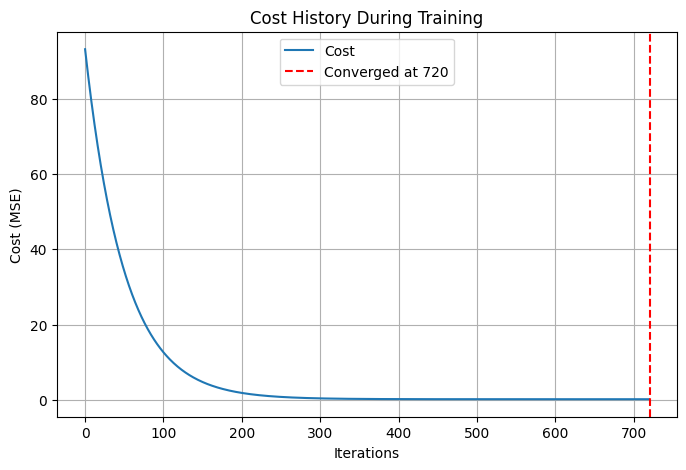

In [ ]:
plt.figure(figsize=(8, 5))  # Set the size of the plot
plt.plot(model.cost_history, label='Cost')  # Plot cost (MSE) over iterations
plt.title('Cost History During Training')  # Set the title of the plot
plt.xlabel('Iterations')  # Label for x-axis (training iterations)
plt.ylabel('Cost (MSE)')  # Label for y-axis (Mean Squared Error)
plt.grid(True)  # Enable grid for better readability

# If model converged early, mark the iteration it happened
if model.converged:
    converged_at = len(model.cost_history)
    plt.axvline(x=converged_at, color='red', linestyle='--', label=f'Converged at {converged_at}')
    plt.legend()  # Show legend to identify lines

plt.show()  # Display the plot


Actual vs Predicted Plot (with R²)

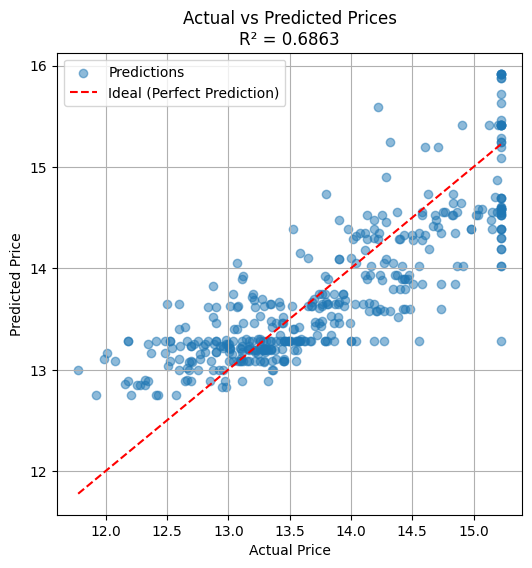

In [ ]:
y_test_pred = model.predict(X_test.values)  # Predict prices on the test set
r2 = model.r_squared(y_test.values, y_test_pred)  # Calculate R² score for test predictions

plt.figure(figsize=(6, 6))  # Create a square plot
plt.scatter(y_test, y_test_pred, alpha=0.5, label='Predictions')  # Scatter plot of actual vs predicted values
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal (Perfect Prediction)')
# Red dashed line shows perfect prediction line (where actual = predicted)

plt.xlabel('Actual Price')  # Label x-axis
plt.ylabel('Predicted Price')  # Label y-axis
plt.title(f'Actual vs Predicted Prices\nR² = {r2:.4f}')  # Title includes R² value
plt.legend()  # Show legend for plot lines
plt.grid(True)  # Add grid for readability
plt.show()  # Display the plot


Residual Analysis (Scatter Plot + Histogram)



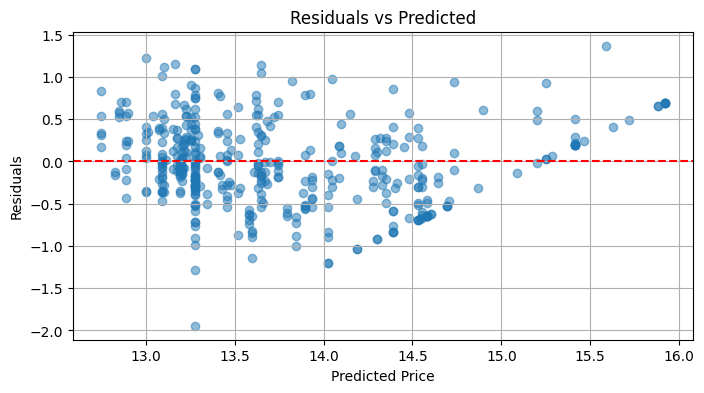

In [ ]:
residuals = y_test_pred - y_test.values  # Calculate residuals (prediction errors)

plt.figure(figsize=(8, 4))  # Set figure size
plt.scatter(y_test_pred, residuals, alpha=0.5)  # Scatter plot of residuals vs predicted values
plt.axhline(y=0, color='red', linestyle='--')  # Add horizontal line at y=0 to visualize error center
plt.xlabel('Predicted Price')  # Label x-axis
plt.ylabel('Residuals')  # Label y-axis
plt.title('Residuals vs Predicted')  # Title of the plot
plt.grid(True)  # Add grid for clarity
plt.show()  # Display the plot


Histogram of residuals

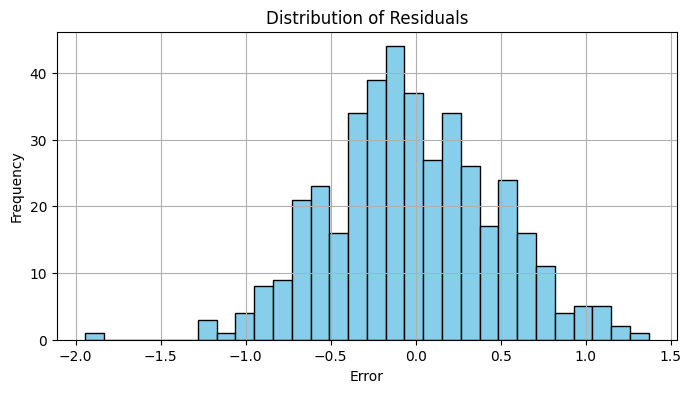

In [ ]:
plt.figure(figsize=(8, 4))  # Set the size of the histogram plot
plt.hist(residuals, bins=30, color='skyblue', edgecolor='black')  # Plot histogram of residuals with 30 bins
plt.title('Distribution of Residuals')  # Title of the histogram
plt.xlabel('Error')  # Label for x-axis (residual/error)
plt.ylabel('Frequency')  # Label for y-axis (how often each error occurs)
plt.grid(True)  # Show grid for better readability
plt.show()  # Display the histogram